In [1]:
%run ./Preamble.ipynb

all_models = PM.check_for_existing_patterns("activations")
# Uncomment below lines to use specific model sets:
# all_models=PM.gpt2xl_models
# all_models=PM.gpt2_models
# all_models=['gpt2','gpt2-untrained_1','gpt2-untrained_1_weight_config_all']
print(all_models)


## load preprocessed data
# ys = PM.load_ys(v=0) # , use_cache=False)
# Xss = PM.load_Xss(all_models, v=0) # , use_cache=False)
# ys_6 = PM.load_ys(compress_to_POS_6=True,v=0) # , use_cache=False)
# Xss_6 = PM.load_Xss(all_models, compress_to_POS_6=True,v=0) # , use_cache=False)

exp = "exp2" # experiment folder code


['gpt2-xl', 'gpt2-xl-untrained_1', 'gpt2', 'gpt2-untrained_1', 'gpt2-untrained_2', 'gpt2-untrained_3', 'gpt2-untrained_4', 'gpt2-untrained_5', 'gpt2-untrained_6', 'gpt2-untrained_7', 'gpt2-untrained_8', 'gpt2-untrained_9', 'gpt2-untrained_1_weight_config_all', 'gpt2-untrained_2_weight_config_all', 'gpt2-untrained_3_weight_config_all', 'gpt2-untrained_4_weight_config_all', 'gpt2-untrained_5_weight_config_all', 'gpt2-untrained_6_weight_config_all', 'gpt2-untrained_7_weight_config_all', 'gpt2-untrained_8_weight_config_all', 'gpt2-untrained_9_weight_config_all']


## Load data for analysis

In [2]:
# Load the selective neuron data frames
FS_pmax_df = PM.load_data(exp, "FS_pmax_df_quicksave.csv")  # Load preprocessed max p-value data
FS_df = PM.load_data(exp, "FS_df_quicksave.csv")  # Load the full dataset

# Prepare DataFrames for analysis (custom DataDisplayer method)
FS_pmax_df = DD.prep_df_for_analysis(FS_pmax_df)
FS_df = DD.prep_df_for_analysis(FS_df)

# Column renamer for better display of DataFrames
column_renamer = DD.df_display_renameer
save = False  # Set to True if you want to save figures or results

# Selective neurons across all categories
selective_neurons_all_categories = [
    FS_df[FS_df[sel] == 1][["model", "layer_idx", "neuron_idx"]] for sel in sels
]

# Print the count of selective neurons for each category
for sel, sel_inds in zip(sels, selective_neurons_all_categories):
    print(sel, len(sel_inds))


sel_0 251
sel_1 262
sel_2 2813
sel_3 87645
sel_4 389
sel_5 2122


## Plot Histograms for Selective Neurons Across Layers

All layers


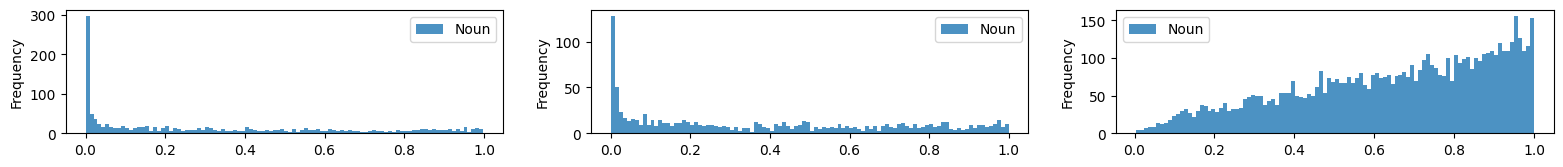

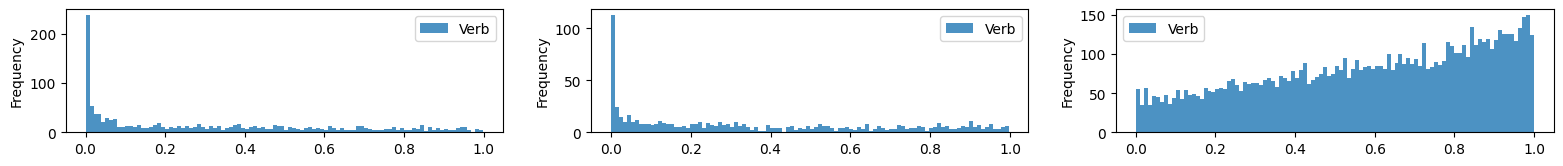

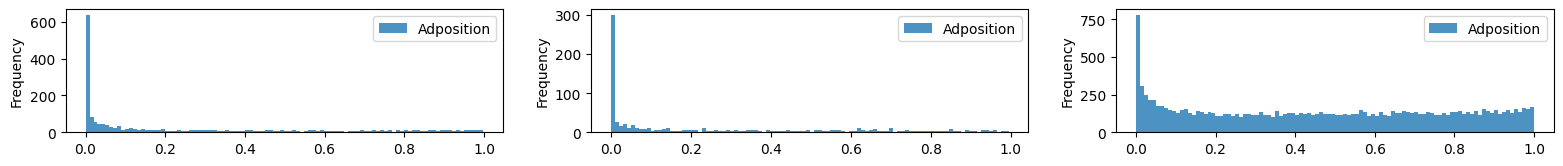

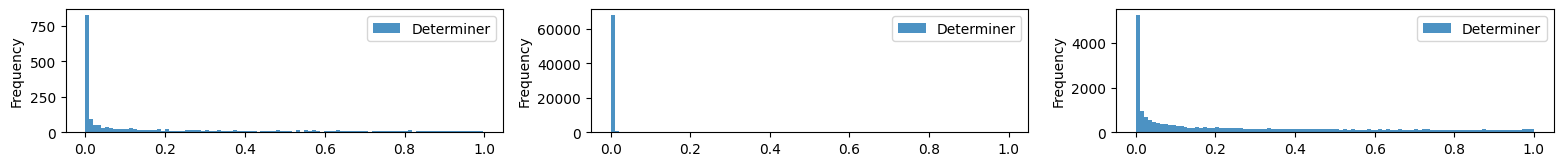

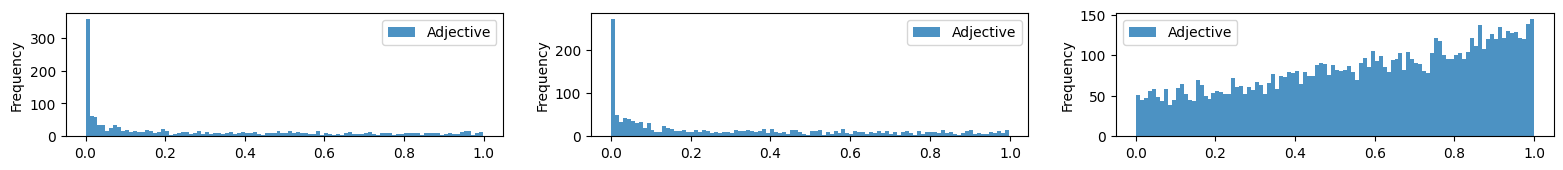

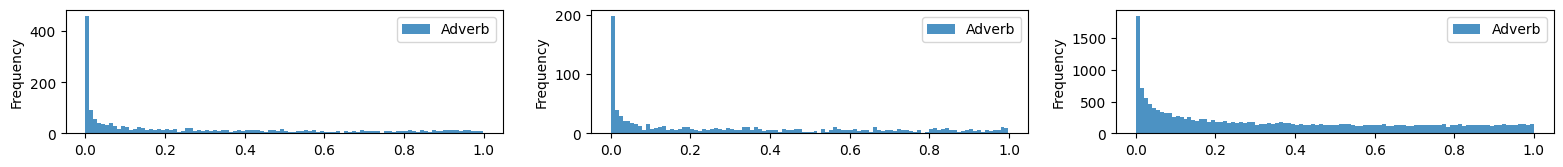

In [3]:
# Plot histograms of selective neurons' p-values for all layers

print("All layers")
in_df = FS_pmax_df  # Exclude dropout layer

in_df = in_df[in_df["model"].isin(all_models[:3])]  # Use only the first three models for plotting

# Iterate through all the metrics in maxps and plot histograms
for x in maxps:
    in_df2 = in_df[in_df[x] < 1]  # Filter data where p-values are less than 1
    default_fig_size = plt.rcParams.get('figure.figsize')  # Get default figure size
    plot_dims = (1, 3)  # Plot dimensions (1 row, 3 columns)
    fig_size = (default_fig_size[0] * plot_dims[1], default_fig_size[1] * plot_dims[0] / 3)  # Adjust figure size
    fig, axs = plt.subplots(*plot_dims)  # Create subplots
    fig.set_size_inches(fig_size)  # Set figure size

    # Plot histogram for each model in the filtered data
    for i, (model, df) in enumerate(in_df2.groupby(["model"])):
        _ = df[[x]].rename(columns=column_renamer).plot.hist(bins=100, alpha=0.8, ax=axs[i])  # Plot histogram

    # Show the plots
    _ = plt.show()


No dropout layer


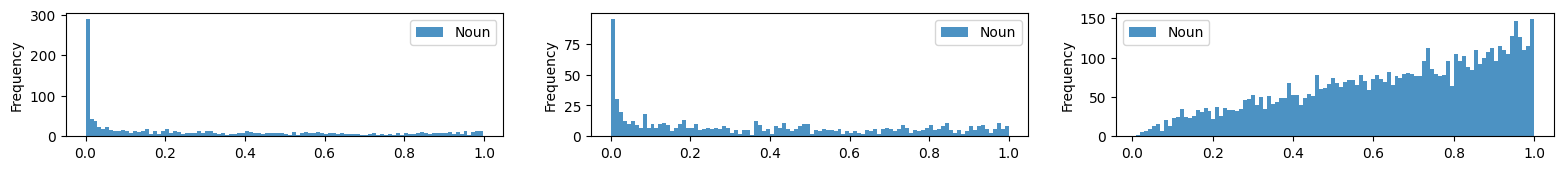

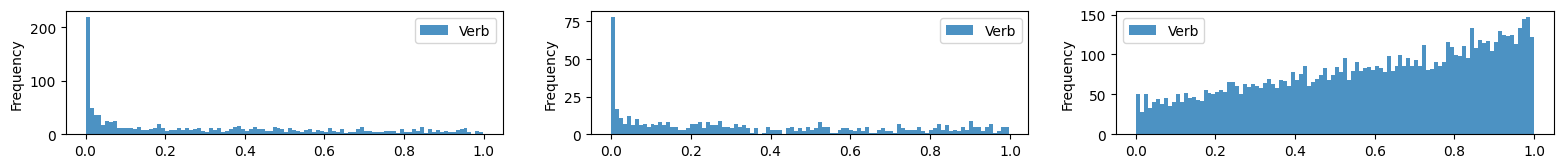

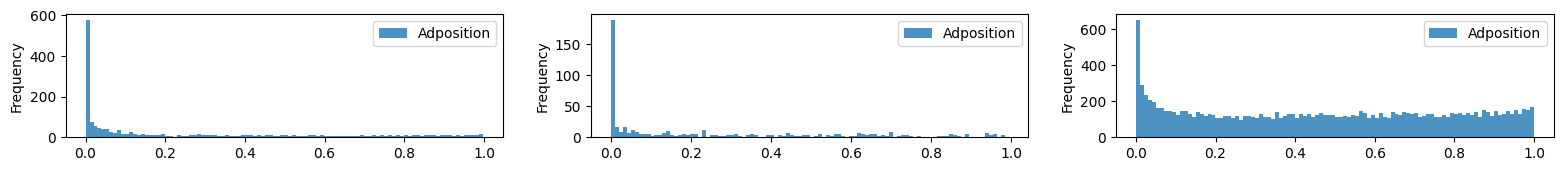

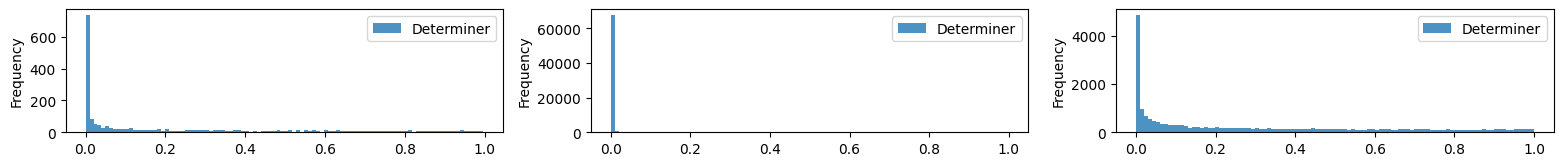

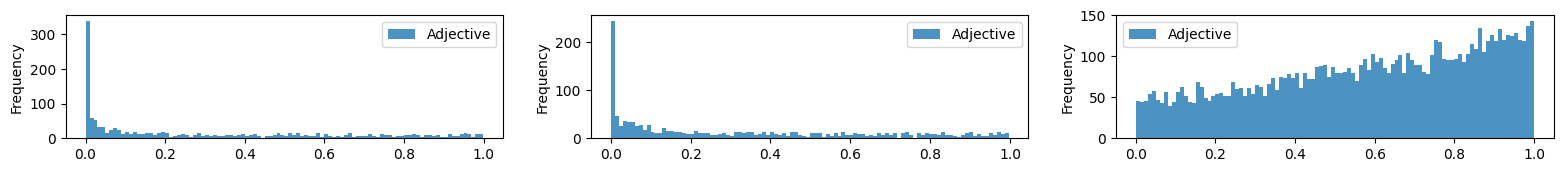

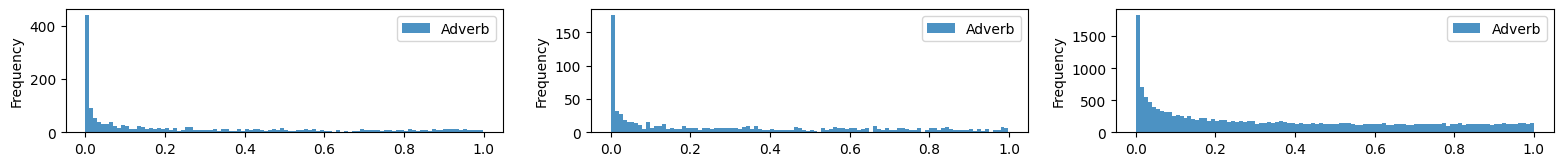

In [4]:
# Plot histograms of selective neurons' p-values, excluding the dropout layer

print("No dropout layer")
in_df = FS_pmax_df[FS_pmax_df["layer_idx"] != 0]  # Exclude dropout layer
in_df = in_df[in_df["model"].isin(all_models[:3])]  # Use only the first three models for plotting

# Iterate through all the metrics in maxps and plot histograms
for x in maxps:
    in_df2 = in_df[in_df[x] < 1]  # Filter data where p-values are less than 1
    default_fig_size = plt.rcParams.get('figure.figsize')  # Get default figure size
    plot_dims = (1, 3)  # Plot dimensions (1 row, 3 columns)
    fig_size = (default_fig_size[0] * plot_dims[1], default_fig_size[1] * plot_dims[0] / 3)  # Adjust figure size
    fig, axs = plt.subplots(*plot_dims)  # Create subplots
    fig.set_size_inches(fig_size)  # Set figure size

    # Plot histogram for each model in the filtered data
    for i, (model, df) in enumerate(in_df2.groupby(["model"])):
        _ = df[[x]].rename(columns=column_renamer).plot.hist(bins=100, alpha=0.8, ax=axs[i])  # Plot histogram

    # Show the plots
    _ = plt.show()


Only dropout layer


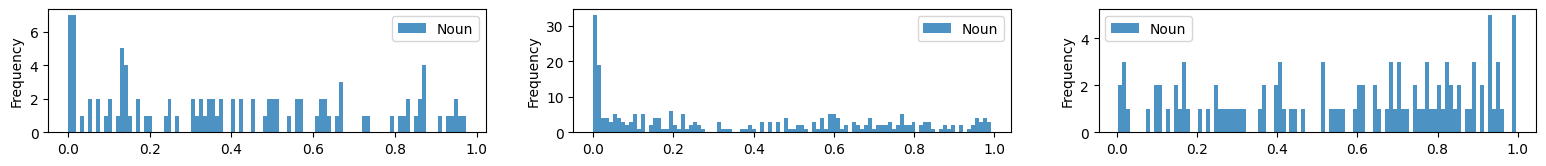

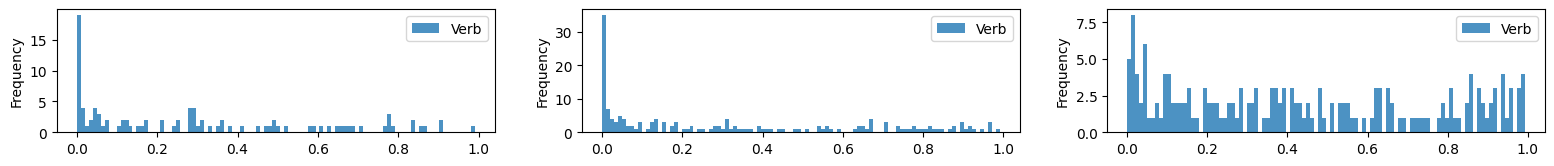

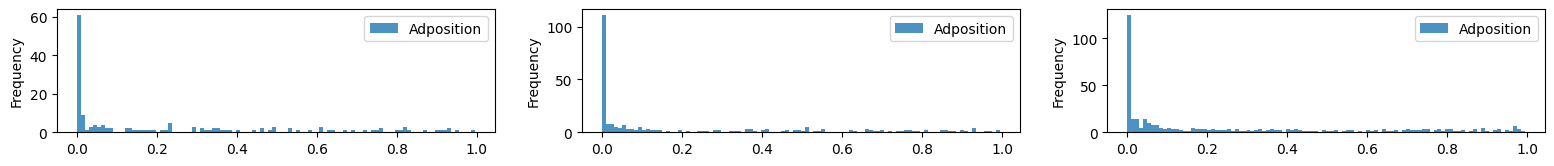

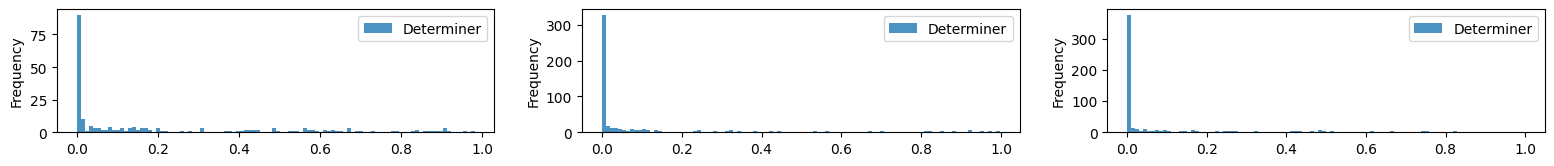

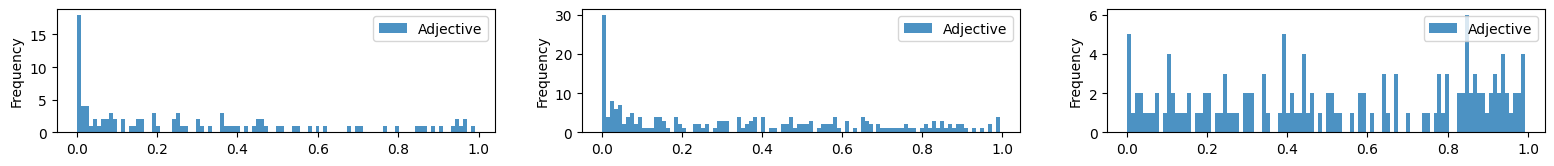

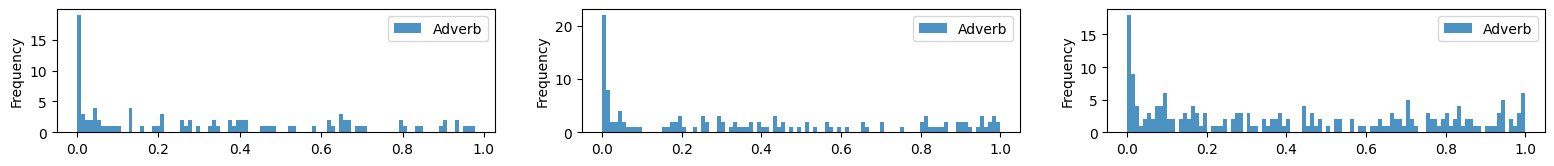

In [5]:
# Plot histograms of selective neurons' p-values for the dropout layer

print("Only dropout layer")
in_df = FS_pmax_df[FS_pmax_df["layer_idx"] == 0]  # Only include dropout layer
in_df = in_df[in_df["model"].isin(all_models[:3])]  # Use only the first three models for plotting

# Iterate through all the metrics in maxps and plot histograms
for x in maxps:
    in_df2 = in_df[in_df[x] < 1]  # Filter data where p-values are less than 1
    default_fig_size = plt.rcParams.get('figure.figsize')  # Get default figure size
    plot_dims = (1, 3)  # Plot dimensions (1 row, 3 columns)
    fig_size = (default_fig_size[0] * plot_dims[1], default_fig_size[1] * plot_dims[0] / 3)  # Adjust figure size
    fig, axs = plt.subplots(*plot_dims)  # Create subplots
    fig.set_size_inches(fig_size)  # Set figure size

    # Plot histogram for each model in the filtered data
    for i, (model, df) in enumerate(in_df2.groupby(["model"])):
        _ = df[[x]].rename(columns=column_renamer).plot.hist(bins=100, alpha=0.8, ax=axs[i])  # Plot histogram

    # Show the plots
    _ = plt.show()